In [ ]:
#Importing the required libraries
import gzip
import os
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

# Clustering the KOS dataset

In [ ]:
#Extracting the data
path="C:/"
arr_kos=[]
a=os.path.join(path,"Users/","rakti/","Downloads/","docword.kos.txt.gz")
with gzip.open(a, 'rb') as f:
    file_content = f.readlines()
for i in file_content:
    val=i.decode('UTF-8')
    arr_kos.append(val[:-1])
arr_kos


['3430',
 '6906',
 '353160',
 '1 61 2',
 '1 76 1',
 '1 89 1',
 '1 211 1',
 '1 296 1',
 '1 335 1',
 '1 404 1',
 '1 441 1',
 '1 454 2',
 '1 463 1',
 '1 555 1',
 '1 593 1',
 '1 779 1',
 '1 841 2',
 '1 913 1',
 '1 983 1',
 '1 1116 1',
 '1 1140 1',
 '1 1206 2',
 '1 1219 2',
 '1 1263 1',
 '1 1266 1',
 '1 1267 1',
 '1 1297 2',
 '1 1298 2',
 '1 1316 1',
 '1 1323 2',
 '1 1434 1',
 '1 1534 1',
 '1 1535 1',
 '1 1683 1',
 '1 1715 1',
 '1 1837 2',
 '1 1901 2',
 '1 1919 1',
 '1 2033 1',
 '1 2101 1',
 '1 2111 1',
 '1 2275 1',
 '1 2403 1',
 '1 2640 2',
 '1 2701 1',
 '1 2742 1',
 '1 2953 1',
 '1 3005 2',
 '1 3007 2',
 '1 3112 1',
 '1 3117 1',
 '1 3142 1',
 '1 3219 3',
 '1 3238 2',
 '1 3282 2',
 '1 3310 1',
 '1 3350 1',
 '1 3399 1',
 '1 3420 3',
 '1 3452 1',
 '1 3516 1',
 '1 3534 1',
 '1 3581 1',
 '1 3708 1',
 '1 3745 1',
 '1 3806 1',
 '1 3873 1',
 '1 3929 5',
 '1 3973 1',
 '1 4113 1',
 '1 4143 1',
 '1 4196 1',
 '1 4301 2',
 '1 4347 1',
 '1 4489 1',
 '1 4497 4',
 '1 4560 1',
 '1 4565 1',
 '1 4712 1',
 '

In [ ]:
#Storing the data into a list
nnz_vector_kos=[]
for i in arr_kos[3:]:
    nnz_vector_kos.append(i.split(" "))
nnz_vector_kos=[[int(i),int(j),int(k)] for i,j,k in nnz_vector_kos]
nnz_vector_kos

[[1, 61, 2],
 [1, 76, 1],
 [1, 89, 1],
 [1, 211, 1],
 [1, 296, 1],
 [1, 335, 1],
 [1, 404, 1],
 [1, 441, 1],
 [1, 454, 2],
 [1, 463, 1],
 [1, 555, 1],
 [1, 593, 1],
 [1, 779, 1],
 [1, 841, 2],
 [1, 913, 1],
 [1, 983, 1],
 [1, 1116, 1],
 [1, 1140, 1],
 [1, 1206, 2],
 [1, 1219, 2],
 [1, 1263, 1],
 [1, 1266, 1],
 [1, 1267, 1],
 [1, 1297, 2],
 [1, 1298, 2],
 [1, 1316, 1],
 [1, 1323, 2],
 [1, 1434, 1],
 [1, 1534, 1],
 [1, 1535, 1],
 [1, 1683, 1],
 [1, 1715, 1],
 [1, 1837, 2],
 [1, 1901, 2],
 [1, 1919, 1],
 [1, 2033, 1],
 [1, 2101, 1],
 [1, 2111, 1],
 [1, 2275, 1],
 [1, 2403, 1],
 [1, 2640, 2],
 [1, 2701, 1],
 [1, 2742, 1],
 [1, 2953, 1],
 [1, 3005, 2],
 [1, 3007, 2],
 [1, 3112, 1],
 [1, 3117, 1],
 [1, 3142, 1],
 [1, 3219, 3],
 [1, 3238, 2],
 [1, 3282, 2],
 [1, 3310, 1],
 [1, 3350, 1],
 [1, 3399, 1],
 [1, 3420, 3],
 [1, 3452, 1],
 [1, 3516, 1],
 [1, 3534, 1],
 [1, 3581, 1],
 [1, 3708, 1],
 [1, 3745, 1],
 [1, 3806, 1],
 [1, 3873, 1],
 [1, 3929, 5],
 [1, 3973, 1],
 [1, 4113, 1],
 [1, 4143, 1],

In [ ]:
#Creating the term-document matrix
docs=[i[0] for i in nnz_vector_kos]
wrd=[i[1] for i in nnz_vector_kos]
term_d=np.zeros((max(docs)+1,max(wrd)+1))
for i,j,k in nnz_vector_kos:
  term_d[i][j]=1
term_d=np.transpose(term_d)
term_d


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Creating the Jaccard matrix
jm = pairwise_distances(term_d, metric='jaccard')
jm

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.98461538,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.98461538, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
r=jm.shape

In [ ]:
#Replacing the values with 1-value to obtain a Euclidean space to represent the vectors 
for i in range(r[0]):
  for j in range(r[1]):
    jm[i][j]=1-jm[i][j]
jm

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.01538462,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01538462, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

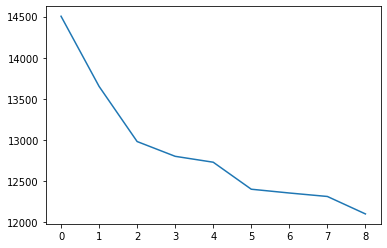

In [ ]:
#Finding the optimal number of clusters
a=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=51).fit(jm)
  a.append(kmeans.inertia_)
plt.plot(a)
plt.title("Elbow plot for KOS dataset")
plt.show()

In [ ]:
#Fitting the data points into clusters
kmeans=KMeans(n_clusters=3,random_state=42).fit(jm)

In [ ]:
#Reducing the dimension of the dataset to visualise it in 3 dimensions
pca = PCA(n_components =3)
X2D = pca.fit_transform(jm)

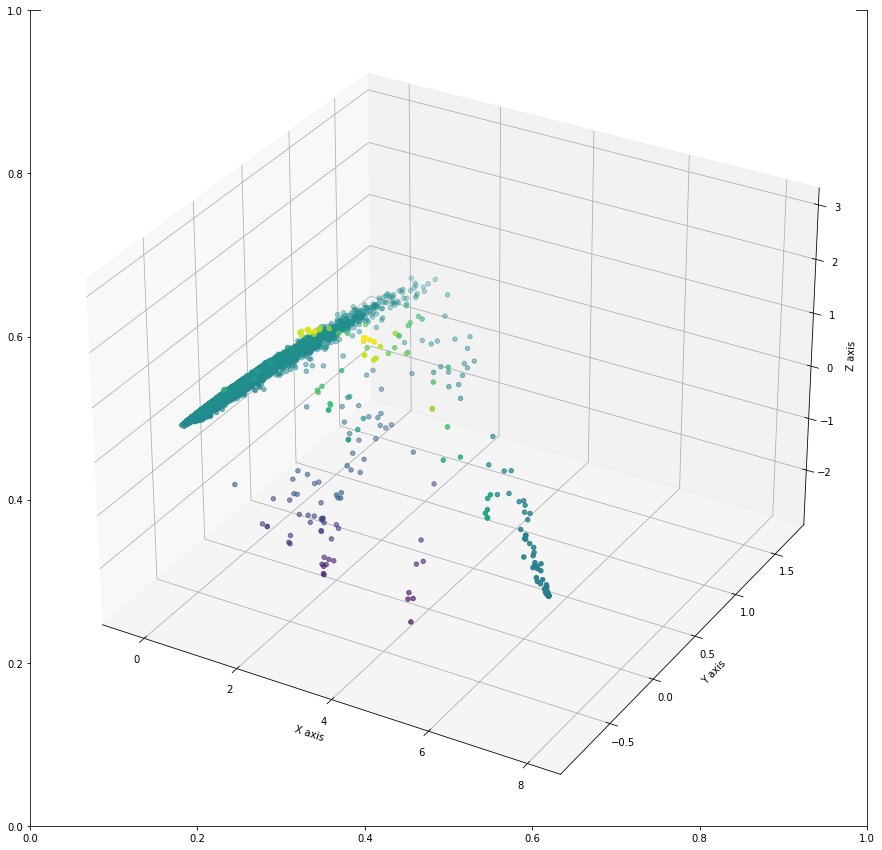

In [ ]:
#Visualizing the data
fig,ax=plt.subplots(figsize=(15,15))
ax = plt.axes(projection='3d')
x=[i[0] for i in X2D]
y=[i[1] for i in X2D]
z=[i[2] for i in X2D]
ax.scatter3D(x, y, z, c=z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [ ]:
#Accuracy metric 
from sklearn.metrics import davies_bouldin_score
labels = kmeans.fit_predict(jm)
davies_bouldin_score(jm,labels)

1.1931764085672916

# Clustering the NIPS dataset

In [ ]:
arr_nips=[]
a=os.path.join(path,"Users/","rakti/","Downloads/","docword.nips.txt.gz")
with gzip.open(a, 'rb') as f:
    file_content = f.readlines()
for i in file_content:
    val=i.decode('UTF-8')
    arr_nips.append(val[:-1])
arr_nips


['1500',
 '12419',
 '746316',
 '1 2 1',
 '1 39 1',
 '1 42 3',
 '1 77 1',
 '1 95 1',
 '1 96 1',
 '1 105 1',
 '1 108 1',
 '1 133 3',
 '1 137 2',
 '1 140 1',
 '1 149 1',
 '1 155 1',
 '1 158 17',
 '1 169 1',
 '1 172 4',
 '1 316 3',
 '1 365 1',
 '1 389 1',
 '1 426 2',
 '1 428 17',
 '1 433 2',
 '1 437 1',
 '1 478 1',
 '1 518 1',
 '1 523 1',
 '1 532 1',
 '1 533 1',
 '1 540 2',
 '1 542 1',
 '1 550 1',
 '1 552 1',
 '1 574 3',
 '1 579 1',
 '1 639 2',
 '1 653 1',
 '1 654 1',
 '1 673 1',
 '1 675 1',
 '1 676 2',
 '1 695 1',
 '1 697 3',
 '1 698 1',
 '1 786 1',
 '1 822 3',
 '1 904 2',
 '1 937 1',
 '1 941 2',
 '1 954 2',
 '1 986 1',
 '1 987 1',
 '1 990 3',
 '1 1056 1',
 '1 1087 3',
 '1 1103 1',
 '1 1135 1',
 '1 1172 1',
 '1 1188 1',
 '1 1213 2',
 '1 1222 1',
 '1 1270 1',
 '1 1282 1',
 '1 1393 3',
 '1 1395 2',
 '1 1398 2',
 '1 1418 1',
 '1 1426 1',
 '1 1482 2',
 '1 1483 1',
 '1 1493 1',
 '1 1497 4',
 '1 1498 16',
 '1 1499 1',
 '1 1500 4',
 '1 1501 3',
 '1 1595 1',
 '1 1614 3',
 '1 1616 1',
 '1 1681 1',

In [ ]:
#Storing the data into a list
nnz_vector_nips=[]
for i in arr_nips[3:]:
    nnz_vector_nips.append(i.split(" "))
nnz_vector_nips=[[int(i),int(j),int(k)] for i,j,k in nnz_vector_nips]
nnz_vector_nips

[[1, 2, 1],
 [1, 39, 1],
 [1, 42, 3],
 [1, 77, 1],
 [1, 95, 1],
 [1, 96, 1],
 [1, 105, 1],
 [1, 108, 1],
 [1, 133, 3],
 [1, 137, 2],
 [1, 140, 1],
 [1, 149, 1],
 [1, 155, 1],
 [1, 158, 17],
 [1, 169, 1],
 [1, 172, 4],
 [1, 316, 3],
 [1, 365, 1],
 [1, 389, 1],
 [1, 426, 2],
 [1, 428, 17],
 [1, 433, 2],
 [1, 437, 1],
 [1, 478, 1],
 [1, 518, 1],
 [1, 523, 1],
 [1, 532, 1],
 [1, 533, 1],
 [1, 540, 2],
 [1, 542, 1],
 [1, 550, 1],
 [1, 552, 1],
 [1, 574, 3],
 [1, 579, 1],
 [1, 639, 2],
 [1, 653, 1],
 [1, 654, 1],
 [1, 673, 1],
 [1, 675, 1],
 [1, 676, 2],
 [1, 695, 1],
 [1, 697, 3],
 [1, 698, 1],
 [1, 786, 1],
 [1, 822, 3],
 [1, 904, 2],
 [1, 937, 1],
 [1, 941, 2],
 [1, 954, 2],
 [1, 986, 1],
 [1, 987, 1],
 [1, 990, 3],
 [1, 1056, 1],
 [1, 1087, 3],
 [1, 1103, 1],
 [1, 1135, 1],
 [1, 1172, 1],
 [1, 1188, 1],
 [1, 1213, 2],
 [1, 1222, 1],
 [1, 1270, 1],
 [1, 1282, 1],
 [1, 1393, 3],
 [1, 1395, 2],
 [1, 1398, 2],
 [1, 1418, 1],
 [1, 1426, 1],
 [1, 1482, 2],
 [1, 1483, 1],
 [1, 1493, 1],
 [1, 14

In [ ]:
#Creating the term-document matrix
docs=[i[0] for i in nnz_vector_nips]
wrd=[i[1] for i in nnz_vector_nips]
term_d=np.zeros((max(docs)+1,max(wrd)+1))
for i,j,k in nnz_vector_nips:
  term_d[i][j]=1
term_d=np.transpose(term_d)
term_d


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Creating the Jaccard matrix
jm = pairwise_distances(term_d, metric='jaccard')
jm

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.94444444, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.94444444, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
r=jm.shape

In [ ]:
#Replacing the values with 1-value to obtain a Euclidean space to represent the vectors 
for i in range(r[0]):
  for j in range(r[1]):
    jm[i][j]=1-jm[i][j]
jm

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05555556, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

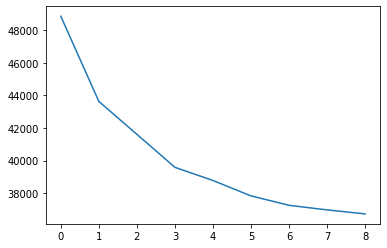

In [ ]:
#Finding the optimal number of clusters
a=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=51).fit(jm)
  a.append(kmeans.inertia_)
plt.plot(a)
plt.title("Elbow plot for NIPS dataset")
plt.show()

In [ ]:
#Fitting the data points into clusters
kmeans=KMeans(n_clusters=2,random_state=42).fit(jm)

In [ ]:
#Reducing the dimension of the dataset to visualise it in 3 dimensions
pca = PCA(n_components =3)
X2D = pca.fit_transform(jm)

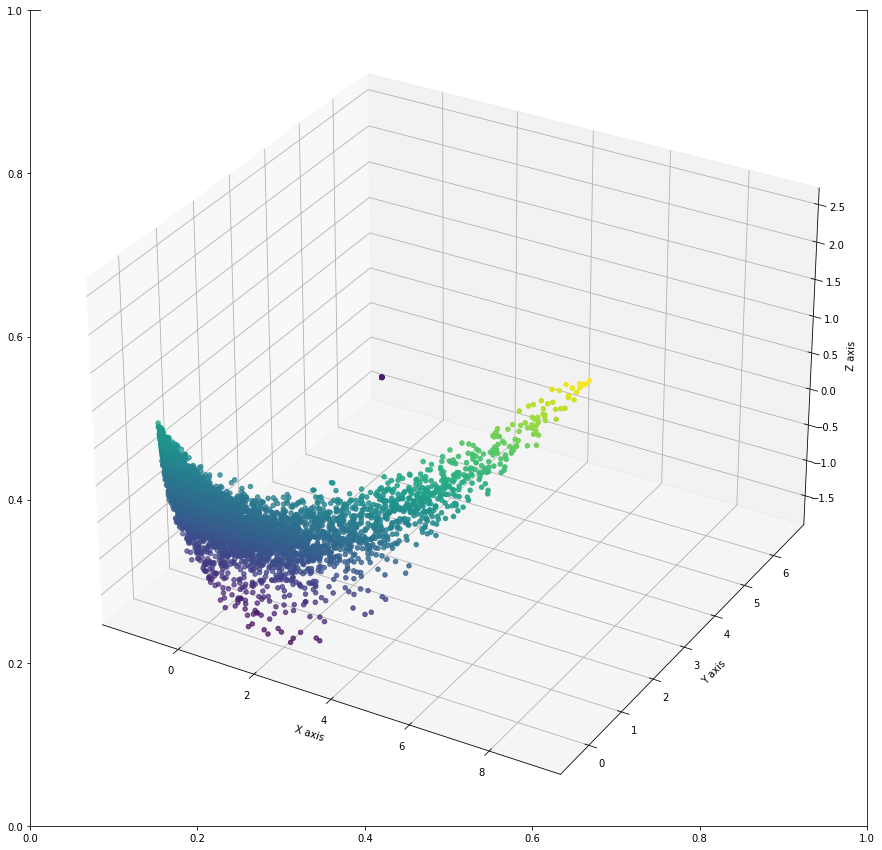

In [ ]:
#Visualizing the data
fig,ax=plt.subplots(figsize=(15,15))
ax = plt.axes(projection='3d')
x=[i[0] for i in X2D]
y=[i[1] for i in X2D]
z=[i[2] for i in X2D]
ax.scatter3D(x, y, z, c=z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
